In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_csv(r'C:\Users\Анна\Downloads\train.csv')

# Гипотеза 

### Выживаемость от возраста

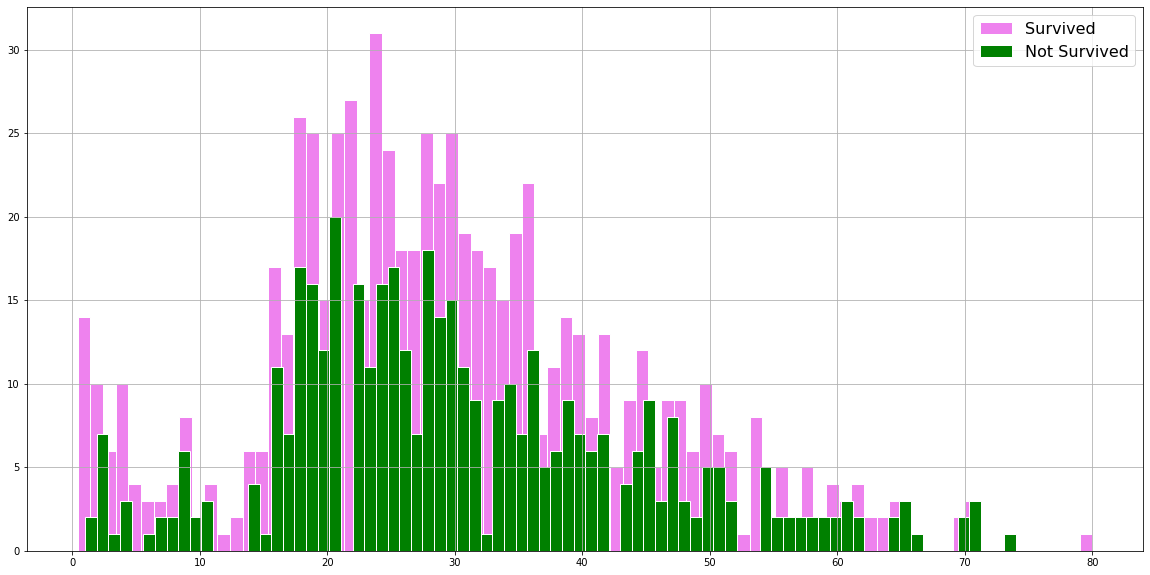

In [47]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True, color = 'violet')

data[data['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})


In [63]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


## Гипотеза 

### Женщины выживали лучше мужчин

In [5]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Гипотеза 

### Несовершеннолетние выживали лучше, чем взрослые

,age,survived,all
0,adult,220,575
1,children,70,139


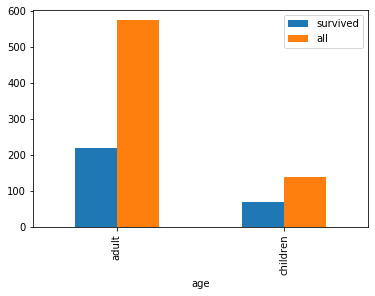

In [40]:
child_data = data[data['Age'] <= 18]
adult_data = data[data['Age'] > 18]

#подсчет общего количества всех и выживших детей и взрослых
child_count = child_data['PassengerId'].count()
adult_count = adult_data['PassengerId'].count()
survive_children_count = child_data['Survived'].sum()
survive_adult_count = adult_data['Survived'].sum()

# Запишем все в лист
children_list = ["children", survive_children_count, child_count]
adult_list = ["adult", survive_adult_count, adult_count]
# total_list = [child_count, adult_count]
survived_list = [survive_children_count, survive_adult_count]

# создадим pandas df
childAdult = pd.DataFrame([ adult_list, children_list], columns = ["age",'survived', 'all'])
# childAdult.plot(x='survived', y='age', kind='hist')
# childAdult

# data["Adult"] = np.where(data["Age"] <= 18, "Child", "Adult")


childAdult.plot.bar(x='age')
# childAdult[childAdult.survived == 1].age.hist()

childAdult
# plt.bar(childAdult.age, childAdult.survived)

В процентном соотношении

In [68]:
# Запишем все в лист
children_list = [survive_children_count/child_count, child_count/child_count]
adult_list = [survive_adult_count/adult_count, adult_count/adult_count]
total_list = [child_count, adult_count]
survived_list = [survive_children_count, survive_adult_count]

# создадим pandas df
CvsA_df = pd.DataFrame([ adult_list, children_list], columns = ['Survived','Total'], index = ['Adult', 'Children', ])
CvsA_df



,Survived,Total
Adult,0.382609,1.0
Children,0.503597,1.0


## Гипотеза: выживаемость зависела от класса

In [69]:
data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Гипотеза: длина имени влияла на выживаемость:)

In [159]:
name_data = data[['Name', 'Survived']]
len_name_data = name_data['Name'].str.len()
name_surv = pd.DataFrame([ len_name_data, name_data['Survived']])
name_surv_trans = name_surv.transpose()    
total = name_surv_trans.values.tolist()
sum_zhivi = 0
sum_mertvi = 0
sum_j = 0
tot = 891
for i, j in total:
    sum_j += j
    if j == 1:
        sum_zhivi += i
    else:
        sum_mertvi += i
print("Средняя длина имени выживших: " + str(sum_zhivi/sum_j))
print("Средняя длина имени вымерших: " + str(sum_mertvi/(tot-sum_j)))
    

Средняя длина имени выживших: 30.871345029239766
Средняя длина имени вымерших: 24.531876138433514


### Вывод: чем длиннее имя, тем больше шанс выжить)

# Гипотеза 

## Выживаемость зависела от количества родственников на борту

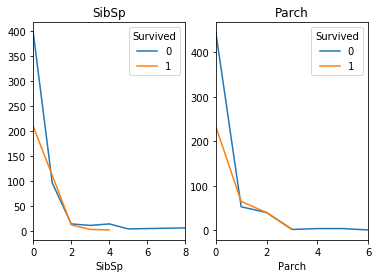

In [38]:
fig, axes = plt.subplots(ncols=2)
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

# Гипотеза 

## Выживаемость зависела от места посадки

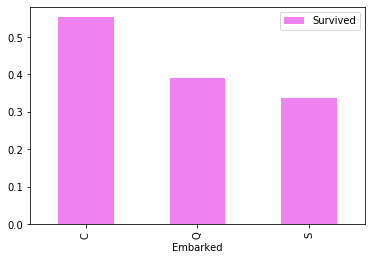

In [44]:
data[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(color = 'violet')

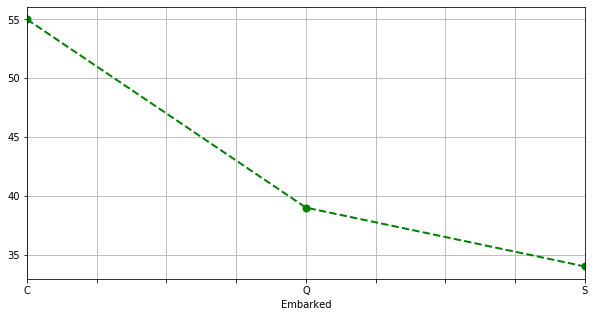

In [36]:
emb = round(100 * data.groupby(['Embarked'])['Survived'].sum() / data.groupby(['Embarked'])['PassengerId'].nunique())
emb.plot(figsize = (10, 5), linestyle = '--', marker = 'o', markersize = 7, grid = True, lw = 2, color = 'green')

Больше всего выживших из C- порта, затем Q, затес S

# Гипотеза 

## Выживаемость зависела от цены билета

Text(0, 0.5, 'Amount of people')

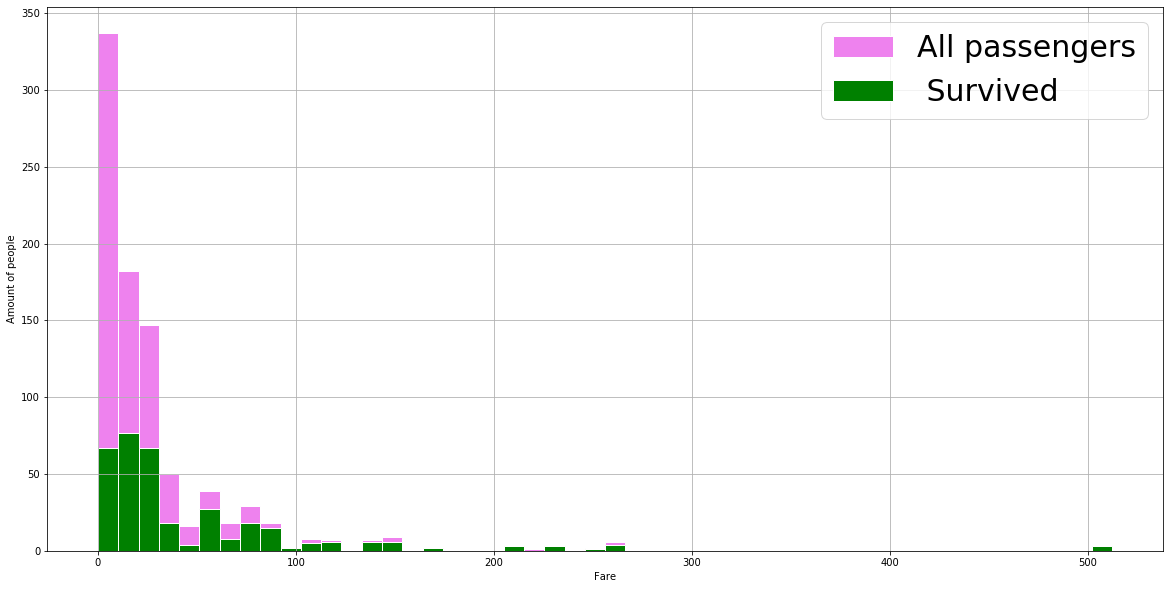

In [35]:
ax = data['Fare'].hist(figsize=(20, 10), bins=50, edgecolor='white',grid=True, color='violet')

data[data['Survived'] == 1]['Fare'].hist(figsize=(20, 10), bins=50, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['All passengers', ' Survived'], prop={'size':30})
ax.set_xlabel('Fare')
ax.set_ylabel('Amount of people')